# Boosting Algorithms Project Tutorial

Este proyecto retoma el dataset utilizado en el proyecto anterior (Random Forest), por lo que se utiliza el mismo repositorio.

No es necesario realizar nuevamente el EDA ni realizar preprocesamiento del dataset, se toma el procesado en la tarea anterior.

In [2]:
! pip install xgboost


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip


In [4]:
# importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import pickle

In [5]:
# se cargan archivos preprocesados
df_train = pd.read_csv('../data/processed/datos_entrenamiento_procesados.csv')
df_test = pd.read_csv('../data/processed/datos_evaluacion_procesados.csv')

In [6]:
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,33.000000,1,0,53.1000,2,1
1,1,0,38.000000,1,0,71.2833,0,1
2,3,1,12.000000,1,0,11.2417,0,1
3,3,1,29.946257,0,0,7.7500,1,0
4,2,1,66.000000,0,0,10.5000,2,0


In [7]:
df_train.shape

(668, 8)

`df_train` tiene 668 filas y 8 columnas

In [8]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1,37.0,1,1,52.5542,2,1
1,3,1,20.0,0,0,7.0500,2,0
2,3,1,45.0,0,0,8.0500,2,1
3,2,1,39.0,0,0,26.0000,2,0
4,3,1,17.0,1,1,7.2292,0,0


In [9]:
df_test.shape

(193, 8)

`df_test` tiene 193 filas y 8 columnas

In [10]:
# creo X e y (train y test)
X_train = df_train.drop(columns = 'Survived')
y_train = df_train['Survived']

X_test = df_test.drop(columns = 'Survived')
y_test = df_test['Survived']


## Step 1: Construir un nuevo modelo usando XGBoost

In [20]:
# creo objetos
D_train = xgb.DMatrix(X_train, label = y_train)
D_test = xgb.DMatrix(X_test, label = y_test)

# defino parámetros
param = {
    'gamma': 0,
    'eta': 0.3, # learning rate
    'max_depth': 5,
    'objective': 'multi:softmax',  # para clasificación
    'num_class': 2, # cantidad de clases de target
    'seed': 3107}  # semilla

# cantidad de iteraciones
steps = 20

# modelo
mod_xgb = xgb.train(param, D_train, steps)

## Step 2: Evaluación del modelo y optimización de hiperparámetros

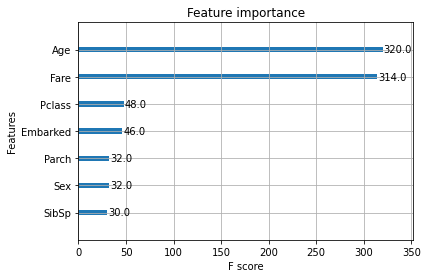

In [21]:
# grafico importancia de las variables
xgb.plot_importance(mod_xgb)
plt.show()

Age y Fare son las variables más importantes en este modelo.

In [22]:
# predicción con muestra test
y_pred = mod_xgb.predict(D_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       117
           1       0.74      0.75      0.75        76

    accuracy                           0.80       193
   macro avg       0.79      0.79      0.79       193
weighted avg       0.80      0.80      0.80       193



Este modelo tiene mejor performance predictivo que el primer modelo Random Forest estimado en el ejercicio anterior:
* accuracy de este modelo es 0.8 (0.78 en anterior).
* precision es 0.84 y 0.74 para 0 y 1 respectivamente, versus 0.82 y 0.73 en el anterior.
* recall es 0.83 y 0.75, contra 0.83 y 0.71 en el modelo Random Forest.
* f1-score es 0.83 y 0.75, para 0.82 y 0.72 en anterior.

In [30]:
# se aplica grid search para optimizar hiperparámetros
clf = xgb.XGBClassifier(steps = 20)
parameters = {
     "eta" : [0.10, 0.30] , # learning rate
     "max_depth" : [5, 10, 15],
     "gamma" : [ 0.0, 0.4, 0.6, 0.8],
     'objective': ['multi:softmax'],  # para clasificación
     'num_class': [2], # cantidad de clases de target
     "seed" : [3107], # semilla
     "loss": ['log_loss', 'deviance', 'exponential'],
     "criterion": ['friedman_mse', 'squared_error', 'mse'],
     }
grid = GridSearchCV(clf, parameters, cv = 5, n_jobs = -1) # n_jobs = -1 implica usar todos los procesadores
grid.fit(X_train, y_train)

[00:29:54] WARNING: ../src/learner.cc:627: 
Parameters: { "criterion", "loss", "steps" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:29:54] WARNING: ../src/learner.cc:627: 
Parameters: { "criterion", "loss", "steps" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:29:54] WARNING: ../src/learner.cc:627: 
Parameters: { "criterion", "loss", "steps" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost 

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'eta': [0.1, 0.3], 'gamma': [0.0, 0.4, 0.6, 0.8],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': [5, 10, 15], 'num_class': [2],
                         'objective': ['multi:softmax'], 'seed': [3107]})

In [31]:
best_param_xgb = grid.best_params_
best_param_xgb

{'criterion': 'friedman_mse',
 'eta': 0.3,
 'gamma': 0.4,
 'loss': 'log_loss',
 'max_depth': 10,
 'num_class': 2,
 'objective': 'multi:softmax',
 'seed': 3107}

In [32]:
# usando la mejor combinación de hiperparámetros, estimo modelo final
mod_xgb_best = xgb.XGBClassifier(**best_param_xgb, steps = 20)
mod_xgb_best.fit(X_train, y_train)

[00:31:35] WARNING: ../src/learner.cc:627: 
Parameters: { "criterion", "loss", "steps" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              criterion='friedman_mse', early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None, gamma=0.4,
              gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              loss='log_loss', max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_class=2, num_parallel_tree=1, ...)

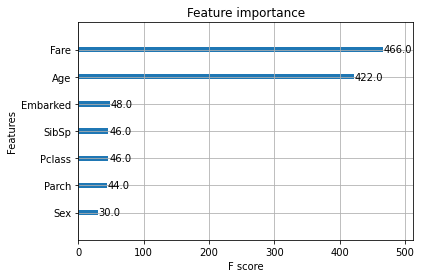

In [33]:
# grafico importancia de las variables
xgb.plot_importance(mod_xgb_best)
plt.show()

Fare y Age siguen siendo las variables más importantes, pero ahora Fare está en primer lugar

In [34]:
# predicción con muestra test
y_pred = mod_xgb_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       117
           1       0.71      0.75      0.73        76

    accuracy                           0.78       193
   macro avg       0.77      0.78      0.77       193
weighted avg       0.78      0.78      0.78       193



A pesar de haber probado distintas combinaciones de parámetros, el modelo inicial tiene una mejor performance en predicción que el optimizado por Cross Validation. Lo inusual es que la combinación de parámetros utilizada en el modelo inicial se incluyó en Grid Search. Se mantiene al modelo inicial como el modelo elegido (final).

In [35]:
# se guarda modelo final
filename = '../models/xgb_finalized_model.sav'
pickle.dump(mod_xgb, open(filename, 'wb'))